### Project Overview
- Your goal is to evaluate every stock in the s&P500, and Nasdaq Adj Close as well as the daily return
- You will look for companies who too a dip (Loss for the day) as  well as companies that have spiked for the today's close

## Project approach:
- Use pandas data reader to get all Adj Close data for each stock for the year 2020 
- Will import all securities form a past project that passed properly through pandas data reader 
- Add all of resuts to a data frame
- Calculate the Daily return for each stock as well as the volitility year to date
- group Dips and Spikes - Which are worthy of investing

In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = pd.read_csv("resources/passed_Tickers.csv", index_col='Unnamed: 0')

In [3]:
tickers = list(tickers["Tickers"].values)

## Fetching the data 
 - we need ot consider companies that myay no longer exist and or have failed 
 - We also need to store the failed companies for future use

In [4]:
data = pd.DataFrame()

In [5]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

## Taking A Look at Arconic and the companies Coorelated Year to Date

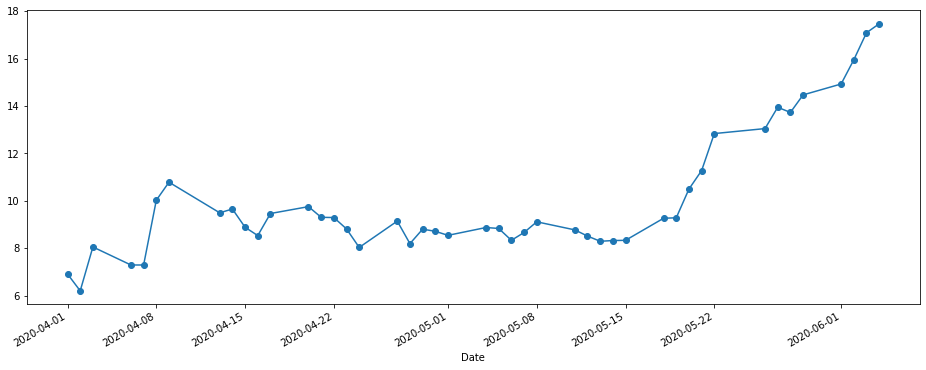

In [6]:
data["ARNC"].plot(figsize = (16,6), marker = "o")

### Passed Companies Passed 
- 471 companies passed the yahoo finance 

In [7]:
len(passed)

471

## Corr to Arconic
- Below are the top 20 companies coorelated to arconic 

In [8]:
data.corrwith(data["ARNC"]).sort_values(ascending = False).head(20)

ARNC    1.000000
RTN     1.000000
ALB     0.940517
PPG     0.930673
MTD     0.923245
TDG     0.922373
NKE     0.920912
GRMN    0.920376
DLTR    0.915136
F       0.911131
ETFC    0.910224
MS      0.909070
EL      0.908383
LB      0.907750
GM      0.903776
MCK     0.903759
GD      0.902682
CHRW    0.901706
XRAY    0.901577
ABC     0.897721
dtype: float64

## Daily Returns for each Stock
- We will focus on todays closing only to see which companies Dip or spikes

In [34]:
returns_df = pd.DataFrame()
for x in passed:
    data[f"{x} daily return"] = data[f"{x}"].pct_change()
    returns_df[f"{x}"] = data[f"{x}"].pct_change()

## Analysis of todays close - Spikes
- top 20 companies that had the highest daily returns at close

In [35]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = False).head(20)

SPG     0.148621
MAC     0.142287
COTY    0.133652
BA      0.129476
M       0.129310
UAL     0.125042
MCHP    0.123399
HBI     0.123134
GPS     0.122066
KIM     0.113782
MGM     0.113187
WYNN    0.111772
ADS     0.108945
PVH     0.108849
DXC     0.104579
DRI     0.099974
UAA     0.094580
IVZ     0.093190
JWN     0.092801
UA      0.092747
Name: 2020-06-03 00:00:00, dtype: float64

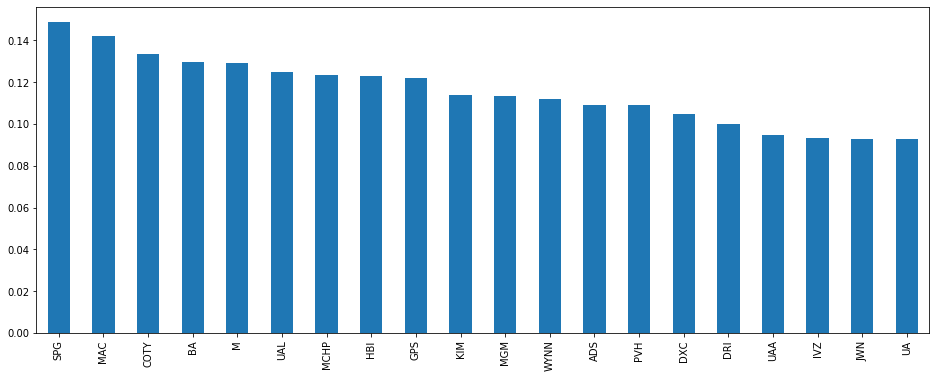

In [36]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (16,6))

### Dips 
- top 20 companies that had the lowest daily returns fot todays close

In [37]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = True).head(20)

CPB    -0.061334
ATVI   -0.041929
TTWO   -0.039376
TSN    -0.038400
NEM    -0.037788
EA     -0.036205
RRC    -0.032761
GIS    -0.030747
CTXS   -0.029888
HUM    -0.027587
VRTX   -0.025539
DGX    -0.025365
DLTR   -0.024851
AKAM   -0.023879
TIF    -0.023840
CAG    -0.023789
HRL    -0.022354
REGN   -0.021662
ALXN   -0.021586
HSY    -0.021577
Name: 2020-06-03 00:00:00, dtype: float64

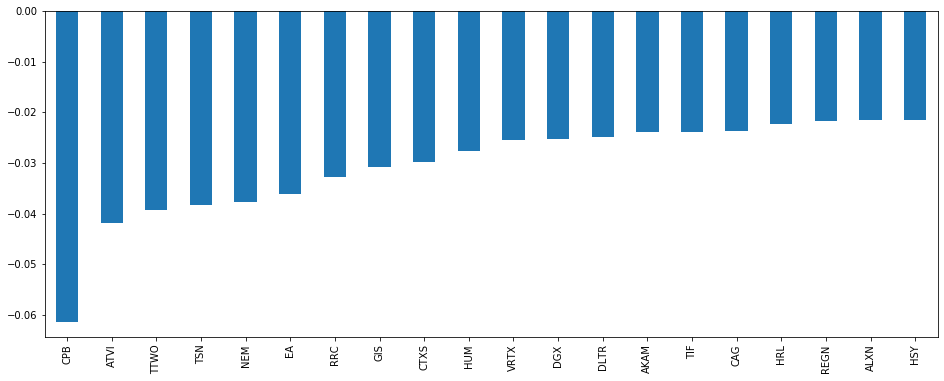

In [38]:
returns_df.transpose()["2020-06-03"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

# Nasdaq - Dips and Spikes

- Fetching Data
- we will repeat the same process for the Nasdaq

In [14]:
nasdaq = pd.DataFrame()

In [15]:
nasdaq_data = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [16]:
nas_tickers = list(nasdaq_data["Ticker"].values)

In [17]:
nas_failed = []
nas_passed = []
for x in nas_tickers:
    try:
        nasdaq[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        nas_passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        nas_failed.append(x)

## Daily Returns for Nasdaq

In [39]:
nas_returns = pd.DataFrame()
for x in nas_passed:
    nasdaq[f"{x} returns"] = nasdaq[f"{x}"].pct_change()
    nas_returns[f"{x}"] = nasdaq[f"{x}"].pct_change()

### Spikes
 - Top 20 companies with the higheest daily returns

In [40]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = False).head(20)

UAL     0.125042
MCHP    0.123399
WYNN    0.111772
NXPI    0.069985
CTAS    0.062000
EXPE    0.058418
LRCX    0.056841
AAL     0.056150
HAS     0.052782
FOXA    0.050171
KLAC    0.049411
BIDU    0.048680
FOX     0.046761
ULTA    0.045933
SIRI    0.045150
MAR     0.044870
MU      0.044853
BKNG    0.042882
ADI     0.041267
AVGO    0.038482
Name: 2020-06-03 00:00:00, dtype: float64

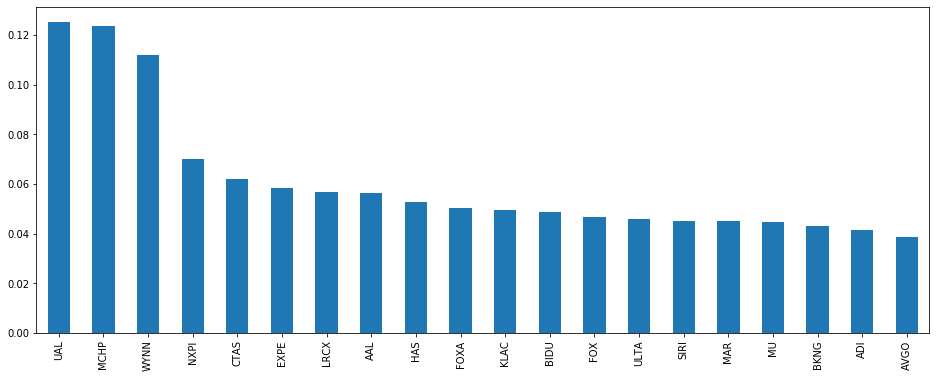

In [41]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

## Dips
- top 20 companies with the lowest daily returns for today

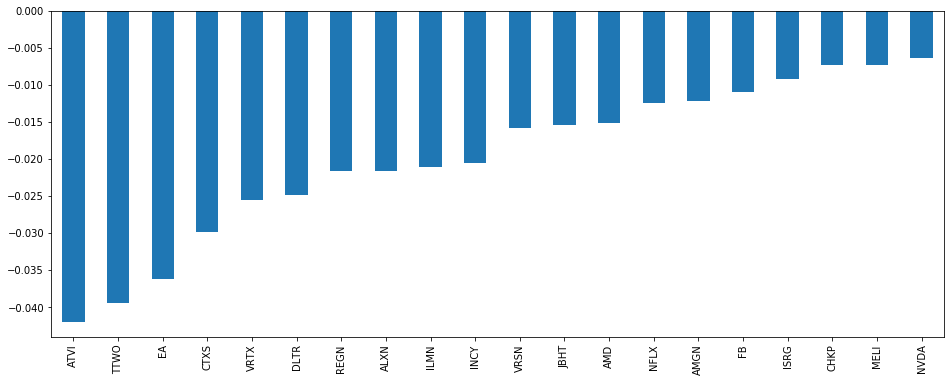

In [42]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

In [43]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = True).head(20)

ATVI   -0.041929
TTWO   -0.039376
EA     -0.036205
CTXS   -0.029888
VRTX   -0.025539
DLTR   -0.024851
REGN   -0.021662
ALXN   -0.021586
ILMN   -0.021117
INCY   -0.020515
VRSN   -0.015778
JBHT   -0.015453
AMD    -0.015129
NFLX   -0.012497
AMGN   -0.012158
FB     -0.011000
ISRG   -0.009227
CHKP   -0.007309
MELI   -0.007269
NVDA   -0.006317
Name: 2020-06-03 00:00:00, dtype: float64

### S&P Vol 2020

In [52]:
cols = [x for x in returns_df]

In [83]:
sandp_vol = []
for x in returns_df.columns:
    sandp_vol.append(returns_df[f"{x}"].std())

In [84]:
s_andp_volitility = pd.DataFrame(sandp_vol, index=cols, columns=["vol"])

### Top 10 most volitile companies - S&P 2020 - year to date

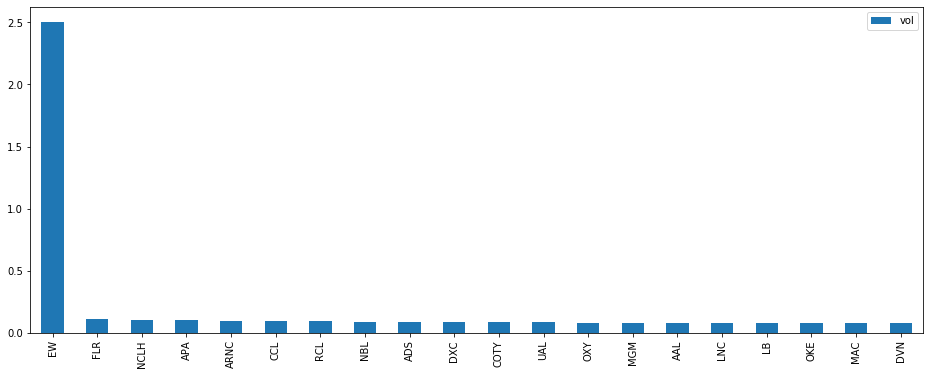

In [90]:
s_andp_volitility.sort_values("vol", ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

### Top 10 least volitile companies - S&P 2020 - year to date

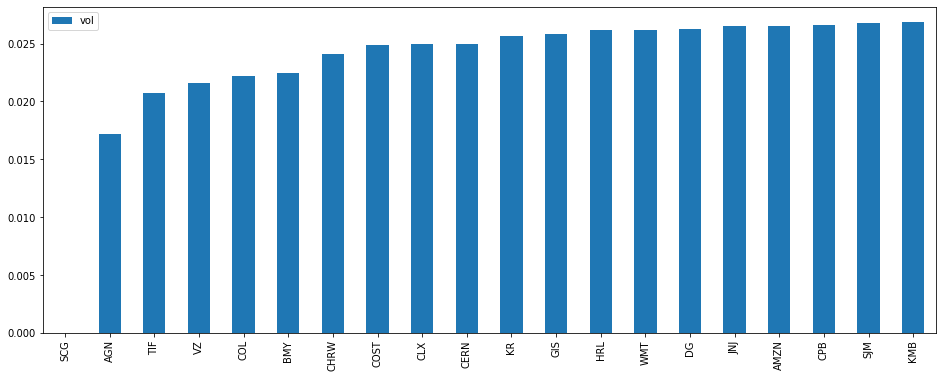

In [99]:
s_andp_volitility.sort_values("vol", ascending = True).head(20).plot(kind = "bar", figsize = (16,6))